In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

# 파일 불러오기

In [3]:
data = pd.read_csv('./data/X_train.csv', encoding = 'CP949') 
# encoding 종류 : UTF-8, CP949, EUC-KR, ascii 등
# text 파일의 경우 sep 설정 주의

In [71]:
pd.read_csv('./data/X_train.csv', encoding = 'CP949', header=3)
pd.read_csv('./data/X_train.csv', encoding = 'CP949', index_col='cust_id')
#index_col 설정, header 설정 알아두기

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0


In [113]:
data.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


# 특정 행, 열 삭제 후 카운팅
ex) 주 구매지점이 강남점인 행을 삭제한 뒤 total 행의 개수는?

In [45]:
a = data.drop(data[data['주구매지점']=='강남점'].index, axis=0)
len(a)

3355

ex) 주 구매지점이 강남점, 잠실점인 행을 삭제한 뒤 total 행의 개수는?

In [46]:
b = data[~data['주구매지점'].isin(['강남점','잠실점'])]
len(b)

2881

ex) 주 구매지점이 강남점, 잠실점인 행을 삭제, 주말방문비율, 구매주기 열을 삭제한 후 dataframe의 shape은?

In [52]:
temp = data[~data['주구매지점'].isin(['강남점','잠실점'])]
temp.drop(data[['주말방문비율','구매주기']], axis=1)
temp.shape

(2881, 10)

# 특정 열의 min, max, mean 값 등등 기술통계값 추출
ex) 구매주기의 min, max, mean 값을 구해라

In [57]:
np.min(data['구매주기']), np.max(data['구매주기']), np.mean(data['구매주기'])
# data.describe()로 더블체크

(0, 166, 20.958285714285715)

ex) 총 구매액의 사분위값 계산해라

In [63]:
Q1 = np.quantile(data['총구매액'],0.25)
Q3 = np.quantile(data['총구매액'],0.75)
IQR = Q3-Q1
Q1, Q3, IQR

(4747050.0, 106507930.0, 101760880.0)

ex) 분산, 표준편차, 왜도 척도값 구해라


In [106]:
np.var(data['환불금액'])
np.std(data['환불금액'])

# scipy 패키지가 없으니 함수 외워두기

#왜도 함수
def skewness_self(inp):
    # 길이
    len_inp = len(inp)
    result = 0
    for i in inp:
        result += ((i - np.mean(inp)) / np.std(inp)) ** 3
    result = result / len_inp
    return result

# 첨도 함수
def kurtosis_self(inp):
    # 길이
    len_inp = len(inp)
    result = 0
    for i in inp:
        result += ((i - np.mean(inp)) / np.std(inp)) ** 4
    result = (result / len_inp) - 3
    return result

skewness_self(data['환불금액']), kurtosis_self(data['환불금액'])

(8.005700628905181, 93.93711680505254)

In [107]:
# 맞는지 더블체크
from scipy.stats import skew, kurtosis

print(skew(data['환불금액']), kurtosis(data['환불금액'])) 

8.005700628904703 93.93711680504623


# 특정 원소 값 수정, 수정 후 기술통계값 추출
ex) nan 값을 평균값(ffill, bfill 등)으로 대체 후 수정된 평균값을 구하라

In [4]:
# 전체 열 nan 값 확인
data.isnull().sum()

# 특정 열 nan 값 확인
data['환불금액'].isnull().sum()

# nan값 대체
data['환불금액'].fillna(method='bfill')
data['환불금액'].fillna(method='ffill')
data['환불금액'] = data['환불금액'].fillna(0)
np.mean(data['환불금액'])

# nan 포함 행 삭제
data.dropna(axis=0)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,0.0,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,0.0,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,0.0,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,0.0,골프,본 점,1,2.000000,1.000000,0
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,3497,75000,75000,0.0,주방용품,창원점,1,1.000000,0.000000,0
3498,3498,1875000,1000000,0.0,화장품,본 점,2,1.000000,0.000000,39


In [118]:
data['주구매지점'].unique()

array(['강남점', '잠실점', '관악점', '광주점', '본  점', '일산점', '대전점', '부산본점', '분당점',
       '영등포점', '미아점', '청량리점', '안양점', '부평점', '동래점', '포항점', '노원점', '창원점',
       '센텀시티점', '인천점', '대구점', '전주점', '울산점', '상인점'], dtype=object)

# 변수변환 (최소-최대 정규화, 표준스케일링, log 변환 등)

In [11]:
data2 = pd.read_csv('./data/mtcars.csv')

In [34]:
# 최소-최대 정규화
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data2[['qsec_sc']] = scale.fit_transform(data2[['qsec']])
len(data2[data2['qsec_sc']>0.5])

9

In [13]:
# 표준스케일링
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data2[['qsec_sc']] = scale.fit_transform(data2[['qsec']])
# 그외 RobustScaler, MinAbsScaler

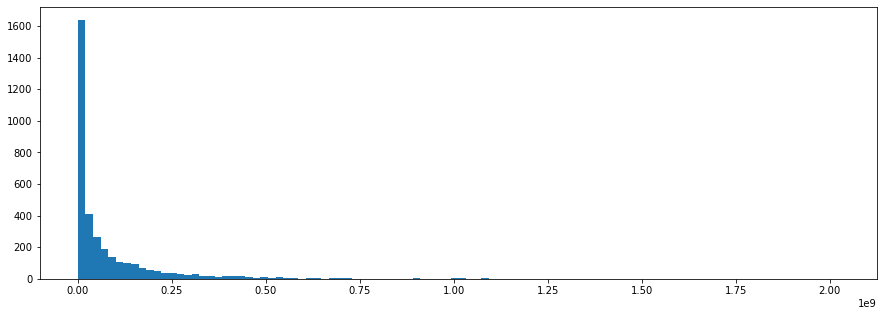

In [52]:
data['최종금액'] = data['총구매액'] - data['환불금액']
plt.figure(figsize = (15,5))
plt.hist(data[['최종금액']], bins=100)
plt.show()

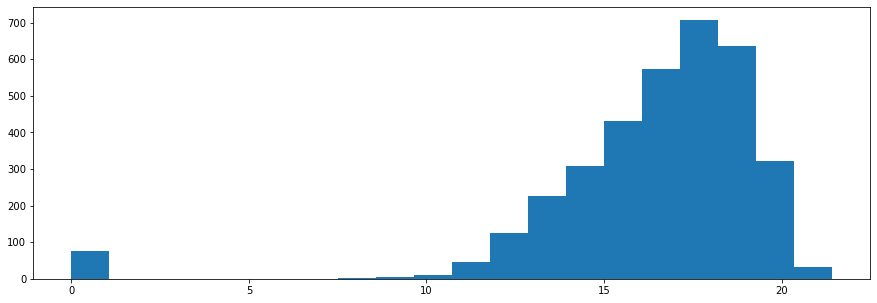

In [71]:
# 로그변환
temp = np.log(data[['최종금액']]+1)
plt.figure(figsize = (15,5))
plt.hist(temp, bins = 20)
plt.show()

# 이상치 제거(사분위수, 표준편차 활용 등)

# 상관계수 구하기

# 혼동행렬 구하기